In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
data = pd.read_csv("./clean_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41198 entries, 0 to 41197
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    41198 non-null  int64  
 1   Views                 41198 non-null  int64  
 2   Price (USD)           41198 non-null  int64  
 3   Space (m^2)           41198 non-null  float64
 4   Number of Rooms       41198 non-null  int64  
 5   Normalized Latitude   41198 non-null  float64
 6   Normalized Longitude  41198 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.2 MB


In [34]:
num_data = data._get_numeric_data()
num_data.columns

Index(['ID', 'Views', 'Price (USD)', 'Space (m^2)', 'Number of Rooms',
       'Normalized Latitude', 'Normalized Longitude'],
      dtype='object')

In [35]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_data.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
ID,41198.0,0.0,8.486582e+08,20599.500000,20599.50000,11892.982532,1.414430e+08,1.000000,412.970000,2060.85000,4120.70000,10300.25000,20599.50000,30898.750000,37078.30000,39138.15000,40786.03000,41198.000000
Views,41198.0,0.0,1.389794e+07,337.344920,107.00000,953.300758,9.087823e+05,0.000000,8.000000,17.00000,23.00000,40.00000,107.00000,315.000000,790.00000,1311.00000,3452.18000,80933.000000
Price (USD),41198.0,0.0,3.502872e+09,85025.299286,63000.00000,71862.311048,5.164192e+09,1000.000000,16000.000000,26000.00000,31500.00000,43000.00000,63000.00000,100000.000000,160000.00000,220000.00000,380000.00000,943000.000000
Space (m^2),41198.0,0.0,3.569523e+06,86.643113,74.00000,49.789347,2.478979e+03,12.000000,28.000000,36.27650,43.00000,55.00000,74.00000,103.000000,145.00000,177.00000,270.00000,593.000000
Number of Rooms,41198.0,0.0,1.192440e+05,2.894412,3.00000,1.088714,1.185297e+00,1.000000,1.000000,1.00000,2.00000,2.00000,3.00000,3.000000,4.00000,5.00000,6.00000,9.000000
Normalized Latitude,41198.0,0.0,2.995405e+06,72.707541,72.24121,8.896685,7.915101e+01,-64.085906,56.081285,65.09502,67.12502,70.54409,72.24121,73.296647,78.74621,79.36113,114.16140,521.805855
Normalized Longitude,41198.0,0.0,2.047406e+06,49.696725,76.96196,89.096745,7.938230e+03,-517.013104,-238.629452,-236.39915,47.70286,74.56133,76.96196,79.838354,83.68763,87.21895,98.48214,323.827719


<AxesSubplot:xlabel='Price (USD)'>

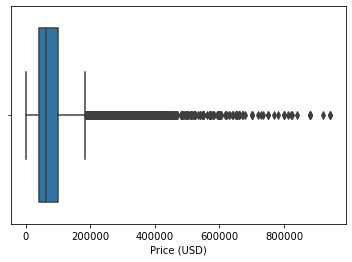

In [38]:
sns.boxplot(x=num_data['Price (USD)'])

<AxesSubplot:xlabel='Space (m^2)'>

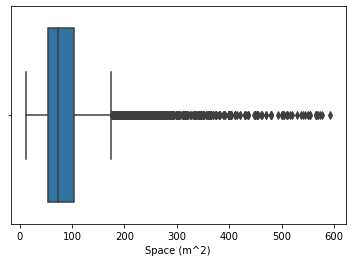

In [39]:
sns.boxplot(x=num_data['Space (m^2)'])

<AxesSubplot:xlabel='Number of Rooms'>

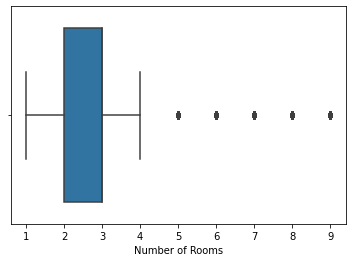

In [40]:
sns.boxplot(x=num_data['Number of Rooms'])

<AxesSubplot:xlabel='Normalized Latitude'>

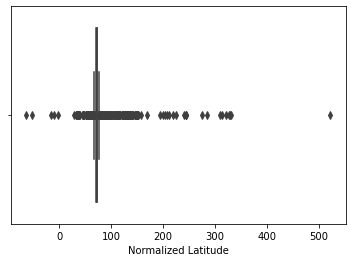

In [41]:
sns.boxplot(x=num_data["Normalized Latitude"])

<AxesSubplot:xlabel='Normalized Longitude'>

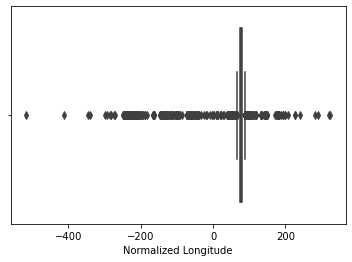

In [42]:
sns.boxplot(x=num_data["Normalized Longitude"])

<AxesSubplot:>

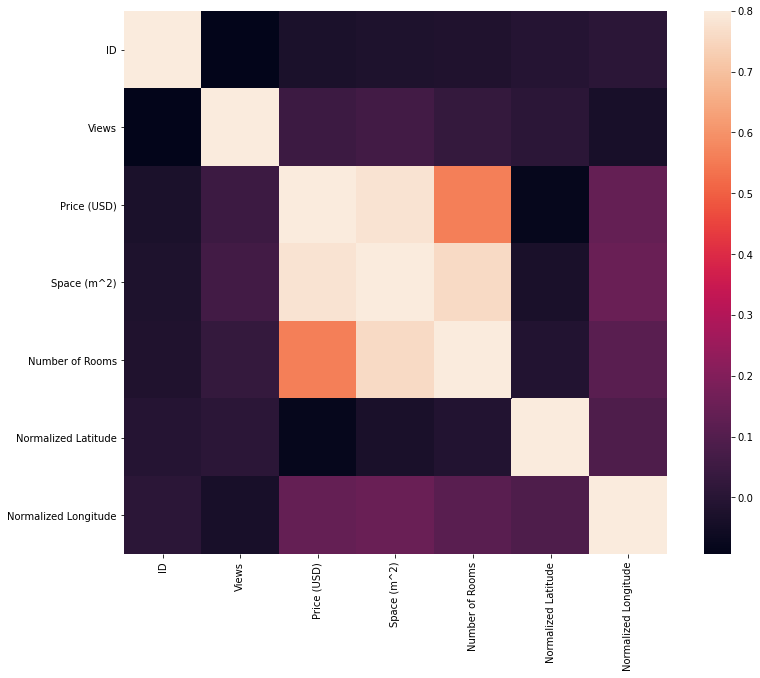

In [43]:
num_corr = num_data.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(num_corr,vmax =.8 ,square = True)